# v1

In [1]:
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from prophet import Prophet
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
from datetime import datetime


/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
def consulta_palavra(palavras_chave):
    current_date = datetime.today().strftime("%Y-%m-%d")
    
    # Crie uma instância do TrendReq
    pytrends = TrendReq(hl='pt-BR', tz=360)  # 'hl' é o idioma, 'tz' é a zona de tempo

    # Crie um payload da consulta
    pytrends.build_payload(palavras_chave, timeframe='2022-01-01 ' + current_date, geo='BR')  # 'timeframe' define o intervalo de tempo, 'geo' define a localização (Brasil)

    # Obtenha os dados de tendência
    dados_tendencia = pytrends.interest_over_time()
    return dados_tendencia


In [4]:
palavras_chave = ['data + science']
dataset = consulta_palavra(palavras_chave)

/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/pytrends/request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(
/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/pytrends/request.py:261: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df2 = df['isPartial'].apply(lambda x: pd.Series(


/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/pytrends/request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(
/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/pytrends/request.py:261: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df2 = df['isPartial'].apply(lambda x: pd.Series(


<Figure size 1000x600 with 0 Axes>

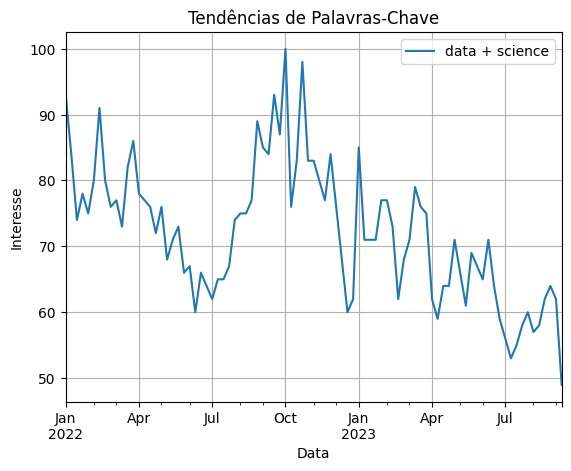

In [5]:
# Plote o gráfico
plt.figure(figsize=(10, 6))
consulta_palavra(palavras_chave).plot()
plt.title('Tendências de Palavras-Chave')
plt.xlabel('Data')
plt.ylabel('Interesse')
plt.grid()
plt.legend()
plt.show();

In [6]:
dataset = dataset.reset_index()
dataset = dataset.drop(columns=['isPartial'])
dataset = dataset.rename(columns={'date': 'ds', palavras_chave[0]: 'y'})

/tmp/ipykernel_8115/1132628677.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['y'])
/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_cont

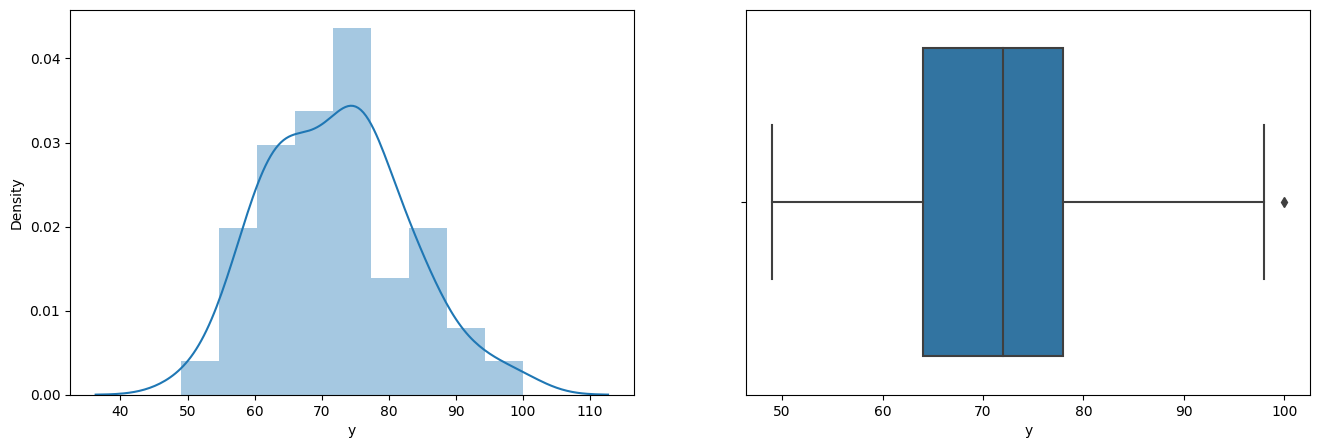

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['y'])
plt.subplot(1,2,2)
sns.boxplot(x=dataset['y'])

plt.show()

In [8]:
z_scores = stats.zscore(dataset['y'])
filtered_entries = (np.abs(z_scores) >= 3)
outliers = dataset[filtered_entries]
outliers.head()

,ds,y


In [9]:
# Criação e ajuste do modelo Prophet
model = Prophet()
model.fit(dataset)

# Criar dataframe com datas futuras para previsão
future = model.make_future_dataframe(periods=18, freq='W')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)


17:59:48 - cmdstanpy - INFO - Chain [1] start processing
17:59:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
47,2022-11-27,73.899106,63.748225,84.683450
48,2022-12-04,73.550843,63.047166,83.311237
49,2022-12-11,73.201998,62.871946,83.750848
50,2022-12-18,72.853153,63.026389,83.202011
51,2022-12-25,72.504290,62.389075,82.476648
52,2023-01-01,72.155428,61.882566,83.077219
53,2023-01-08,71.806566,61.552278,82.259174
54,2023-01-15,71.457228,61.485392,81.873587
55,2023-01-22,71.107890,61.649270,81.361358
56,2023-01-29,70.758552,60.956271,81.083376


/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


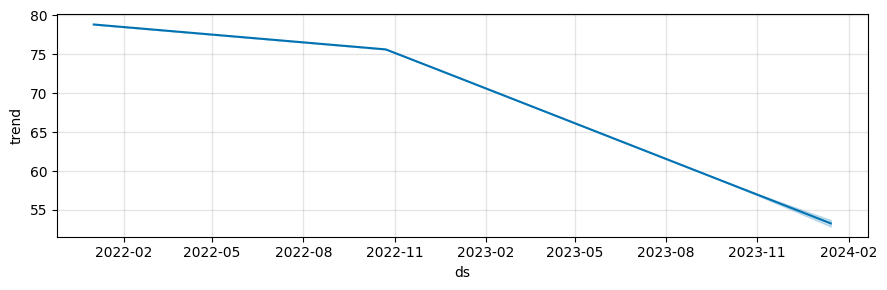

In [10]:
# Plot the components of the model
fig = model.plot_components(forecast)

/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/v4company/repo/keyword_prediction/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


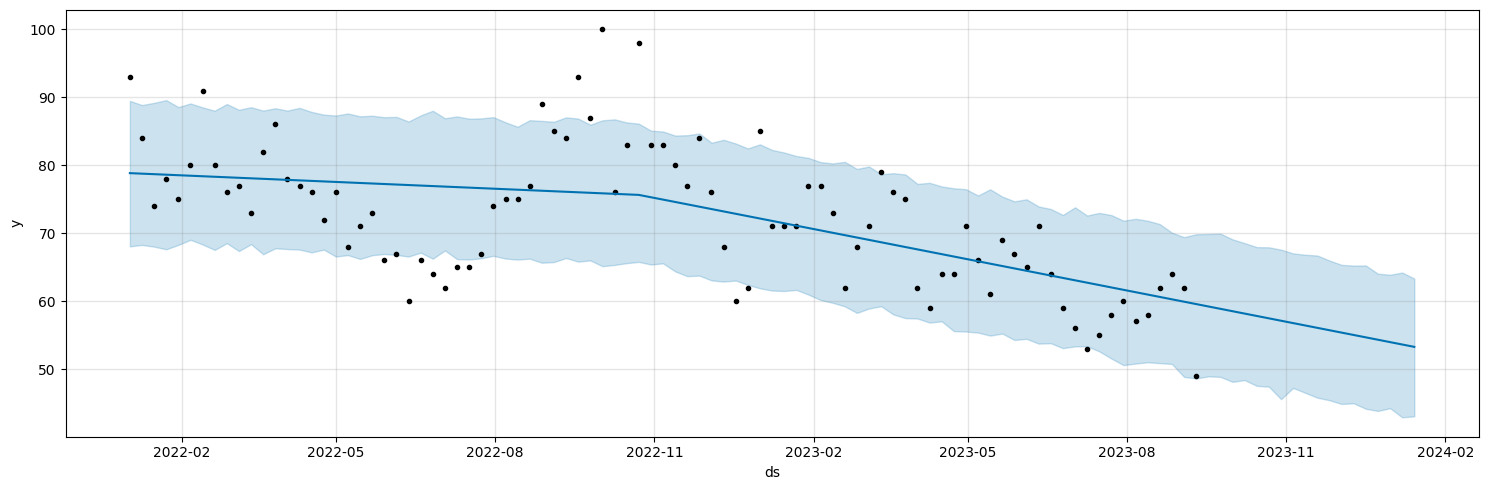

In [11]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

In [12]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.drop(columns=['ds'], axis=1)[forecast.drop(columns=['ds'], axis=1) < 0] = 0
forecast['yhat'][forecast['yhat']<0]=0

In [13]:
forecast['ds'] = forecast['ds'].replace(".",",")
forecast['yhat'] = forecast['yhat'].replace(".",",")
forecast['yhat_lower'] = forecast['yhat_lower'].replace(".",",")
forecast['yhat_upper'] = forecast['yhat_upper'].replace(".",",")


In [14]:
forecast.to_csv('forecast_google_trend_data_science.csv')